# <center>Mortality prediction based on the VAERS post vaccine adverse reactions</center>

## *<center>Authors: Szymon Szewczyk, Łukasz Szyszka</center>*

### *<center>July 7, 2024</center>*

---

### Legal Disclaimer

The purpose of this project is to develop Bayesian Models for predicting the probability of patient mortality due to adverse reactions from COVID-19 vaccination. This project is intended solely for educational purposes. The analysis and results derived from this project should not be interpreted as advice for or against any type of vaccination. The authors strongly recommend that individuals consult with appropriate healthcare professionals before making any health-related decisions. The authors disclaim any responsibility for any consequences resulting from actions taken by individuals based on information from this project, in compliance with applicable US and EU laws.

---

## 1. Problem formulation [0-5 pts]:
- is the problem clearly stated [1 pt]
- what is the point of creating model, are potential use cases defined [1 pt]
- where do data comes from, what does it containt [1 pt]
- DAG has been drawn [1 pt]
- confoundings (pipe, fork, collider) were described [1 pt]

The Bayesian Models developed in this project are designed to predict the probability of patient mortality due to adverse reactions from COVID-19 vaccination. The predictions are based on various predictors, such as the patient's age, sex, number of days since vaccination, and the number of days the patient had to spend in the hospital due to the adverse reaction.

The objective of creating these models is to present the probability of patient mortality in an unbiased and objective manner. The first model is more general, utilizing two predictors, while the second model employs four predictors. Both models can be used similarly to illustrate the influence of different predictors on the final outcome. Healthcare is a critical aspect of our lives, and conducting unbiased research is essential to improving the quality of all forms of medicine and medical services.

The data used to create the models is sourced from the VAERS datasets for the year 2022, available at [VAERS datasets](https://vaers.hhs.gov/data/datasets.html). This data contains reported cases of vaccination adverse reactions in the United States in 2022.
The names and descriptions of the columns can be found below:

#### VAERSDARA.csv:
VAERS_ID: VAERS identification number\
RECVDATE: Date report was received\
STATE: State\
AGE_YRS: Age in years\
CAGE_YR: Calculated age of patient in years *\
CAGE_MO: Calculated age of patient in months *\
SEX: Sex\
RPT_DATE: Date form completed\
SYMPTOM_TEXT: Reported symptom text\
DIED Char: Died\
DATEDIED: Date of death\
L_THREAT: Life-threatening illness\
ER_VISIT: Emergency room or doctor visit\
HOSPITAL: Hospitalized\
HOSPDAYS: Number of days hospitalized\
X_STAY: Prolongation of existing hospitalization\
DISABLE: Disability\
RECOVD: Recovered\
VAX_DATE: Vaccination date\
ONSET_DATE: Adverse event onset date\
NUMDAYS: Number of days (onset date – vaccination date)\
LAB_DATA: Diagnostic laboratory data\
V_ADMINBY: Type of facility where vaccine was administered\
V_FUNDBY: Type of funds used to purchase vaccines\
OTHER_MEDS: Other medications\
CUR_ILL: Illnesses at time of vaccination\
HISTORY: Chronic or long-standing health conditions\
PRIOR_VAX: Prior vaccination event information\
SPLTTYPE: Manufacturer/immunization project report number\
FORM_VERS: VAERS form version 1 or 2\
TODAYS_DATE Date: Date Form Completed\
BIRTH_DEFECT: Congenital anomaly or birth defect\
OFC_VISIT: Doctor or other healthcare provider office/clinic visit\
ER_ED_VISIT: Emergency room/ department or urgent care\
ALLERGIES: Allergies to medications, food, or other products

\* The sum of the two variables CAGE_YR and CAGE_MO provide the calculated age of a person. For example, if CAGE_YR = 1
and CAGE_MO = 0.5, then the age of the individual is 1.5 years, or 1 year 6 months. 

#### VAERSVAX.csv:
VAERS_ID: VAERS identification number\
VAX_TYPE: Administered vaccine type\
VAX_MANU: Vaccine manufacturer\
VAX_LOT: Manufacturer’s vaccine lot\
VAX_DOSE_SERIES: Number of doses administered\
VAX_ROUTE: Vaccination route\
VAX_SITE: Vaccination site\
VAX_NAME: Vaccination name


About VAERS (source: https://vaers.hhs.gov/about.html):\
Established in 1990, the Vaccine Adverse Event Reporting System (VAERS) is a national early warning system to detect possible safety problems in U.S.-licensed vaccines. VAERS is co-managed by the Centers for Disease Control and Prevention (CDC) and the U.S. Food and Drug Administration (FDA). VAERS accepts and analyzes reports of adverse events (possible side effects) after a person has received a vaccination. Anyone can report an adverse event to VAERS. Healthcare professionals are required to report certain adverse events and vaccine manufacturers are required to report all adverse events that come to their attention.

DAG (Directed acyclic graph) used to create the models is presented below:


![DAG graph](DAG_DA_2.png)

The confoundings (pipe, fork, collider) are described below:

#### Pipes: When one variable influences the next in a direct sequence.

'Patient's age' influences both 'Probability of patient reporting illness/adverse reaction(s)' and 'Patient's history of illnesses'.\
'Patient's sex' influences both 'General probability of females suffering from adverse reaction(s) (usually mild ones)' and 'Probability of males suffering from serious adverse reaction(s)'.\
Then all the above except for 'Patient's age' and 'Patient's sex' influence 'Probability that a patient needs hospitalization'.\
Then 'Number of days spent in hospital' influences 'Probability of patient mortality'.

'Type of vaccine (mRNA / Protein subunit)' influences 'Probability of patient mortality'.\
'Vaccine manufacturer' influences 'Probability of patient mortality'.\
'Number of days since vaccination' influences 'Probability of patient mortality'.\
'State of residence (quality of healthcare)' influences 'Probability of patient mortality'.

#### Forks: When one variable influences multiple variables.

Patient's age infuences:
- 'Probability of patient reporting illness/adverse reaction(s)'
- 'Patient's history of illnesses'

Patient's sex influences:
- 'General probability of females suffering from adverse reaction(s) (usually mild ones)'
- 'Probability of males suffering from serious adverse reaction(s)'

#### Colliders: When two or more variables influence a single variable.

'Probability that a patient needs hospitalization' is influenced by:
- 'Probability of patient reporting illness/adverse reaction(s)'
- 'Patient's history of illnesses'
- 'General probability of females suffering from adverse reaction(s) (usually mild ones)'
- 'Probability of males suffering from serious adverse reaction(s)'

'Probability of patient mortality' is influenced by:
- 'Patient's age'
- 'Patient's sex'
- 'Number of days spent in hospital'
- 'Type of vaccine (mRNA / Protein subunit)'
- 'Vaccine manufacturer'
- 'Number of days since vaccination'
- 'State of residence (quality of healthcare)'



## 2. Data preprocessing [0-2 pts]:
- is preprocessing step clearly described [1 pt]
- reasoning and types of actions taken on the dataset have been described [1 pt]

#### Original Data
TODO: Load original data


#### Data preprocessing

Preprocessing of the original data includes several steps, involving three distinctive types of actions:

1. Modifying classification-like columns so that character (string) values such as 'F' or 'M' become integer values ('F' becomes 0 and 'M' becomes 1). This simplifies data analysis without losing any information.

2. Clearing the data of all None or 'U' (undefined) values. This step ensures the data does not contain unrepresentative records. Additionally, for the column 'HOSPDAYS', if there is no value for a certain record, it is replaced by 0.

3. Adding suitable constraints and selection criteria:
- State Selection: Include only the following states: VA, AZ, ME, MS, MA, LA, CT, AL, NV, KS, IL, FL, MN, TX, MO, NH, and NJ. These states were chosen as they are the most representative in the dataset for the year 2022, ensuring relevant trends and proportions are maintained.
- Age Group Selection: Focus on patients aged 50 to 100 years. This age group exhibits a consistent trend regarding mortality rates, making it essential for accurate analysis.
- Vaccine Selection: Include only COVID-19 vaccines manufactured by Pfizer/BioNTech or Moderna. This allows the analysis to focus specifically on mRNA vaccines against COVID-19.
- Hospital Stay Duration: Limit the maximum number of days a patient spent in the hospital to 30. Records exceeding this duration were found to be unrepresentative, while most records fall within this range.
- Report Timing: Restrict the maximum number of days between vaccination and report creation to 90. Reports created more than 90 days after vaccination are unlikely to be related to the vaccination.

In [26]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df_data = pd.read_csv("../dane/2022VAERSDATA.csv", encoding='latin1', low_memory=False)
df_vax = pd.read_csv("../dane/2022VAERSVAX.csv", encoding='latin1', low_memory=False)
df = pd.merge(df_data, df_vax, on='VAERS_ID')
df.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME'],
      dtype='object')

In [3]:
df = df[['VAERS_ID', "STATE", "CAGE_YR", "SEX", "DIED", "HOSPITAL", "HOSPDAYS", "NUMDAYS", "VAX_TYPE", "VAX_MANU"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283454 entries, 0 to 283453
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   VAERS_ID  283454 non-null  int64  
 1   STATE     227998 non-null  object 
 2   CAGE_YR   214658 non-null  float64
 3   SEX       283454 non-null  object 
 4   DIED      8248 non-null    object 
 5   HOSPITAL  39676 non-null   object 
 6   HOSPDAYS  23257 non-null   float64
 7   NUMDAYS   228359 non-null  float64
 8   VAX_TYPE  283454 non-null  object 
 9   VAX_MANU  283454 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 23.8+ MB


In [4]:
df = df[df["SEX"].isin(["F", "M"])]
df['SEX'] = df['SEX'].apply(lambda x: 1 if x == 'M' else 0)
df = df.dropna(subset=["STATE", "CAGE_YR", "NUMDAYS"])
df['DIED'] = df['DIED'].apply(lambda x: 1 if x == 'Y' else 0)
df['HOSPITAL'] = df['HOSPITAL'].apply(lambda x: 1 if x == 'Y' else 0)
df['HOSPDAYS'] = pd.to_numeric(df['HOSPDAYS'], errors='coerce').fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173665 entries, 208 to 283453
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   VAERS_ID  173665 non-null  int64  
 1   STATE     173665 non-null  object 
 2   CAGE_YR   173665 non-null  float64
 3   SEX       173665 non-null  int64  
 4   DIED      173665 non-null  int64  
 5   HOSPITAL  173665 non-null  int64  
 6   HOSPDAYS  173665 non-null  float64
 7   NUMDAYS   173665 non-null  float64
 8   VAX_TYPE  173665 non-null  object 
 9   VAX_MANU  173665 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 14.6+ MB


In [5]:
######################### STATES #######################
df = df[df["STATE"].isin(["VA", "AZ", "ME", "MS", "MA", "LA", "CT", "AL", "NV", "KS", "IL", "FL", "MN", "TX", "MO", "NH", "NJ"])]

######################### AGE ########################
df = df[df["CAGE_YR"] >= 50]
df = df[df["CAGE_YR"] <= 100]

#################### VACCINE TYPE ########################
df = df[df["VAX_TYPE"] == 'COVID19']

#################### VACCINE MANU ########################
df = df[df["VAX_MANU"].isin(["MODERNA", r"PFIZER\BIONTECH"])]

#################### HOSPDAYS ########################
df = df[df["HOSPDAYS"] <= 30]

#################### NUMDAYS ########################
df = df[df["NUMDAYS"] <= 90]

df.describe()

,VAERS_ID,CAGE_YR,SEX,DIED,HOSPITAL,HOSPDAYS,NUMDAYS
count,1.631600e+04,16316.000000,16316.000000,16316.000000,16316.000000,16316.000000,16316.000000
mean,2.256706e+06,65.634714,0.361792,0.018142,0.097879,0.416524,15.132079
std,1.498792e+05,9.937238,0.480534,0.133468,0.297161,2.120104,24.162300
min,1.997131e+06,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.131228e+06,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.257472e+06,65.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.372556e+06,72.000000,1.000000,0.000000,0.000000,0.000000,22.000000
max,2.719846e+06,100.000000,1.000000,1.000000,1.000000,30.000000,90.000000


## Correlation matrix for data from 2022

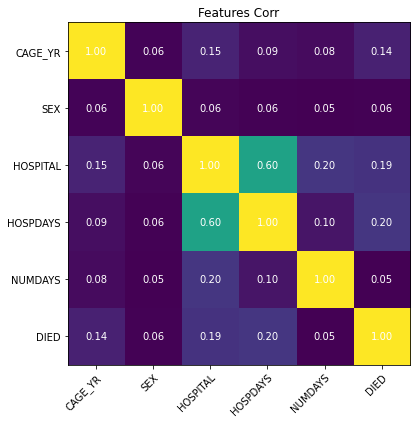

In [6]:
corr = df[["CAGE_YR", "SEX", "HOSPITAL", "HOSPDAYS", "NUMDAYS", "DIED"]].corr()
cor = ["CAGE_YR", "SEX", "HOSPITAL", "HOSPDAYS", "NUMDAYS", "DIED"]

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(corr)

ax.set_xticks(np.arange(len(cor)), labels=cor)
ax.set_yticks(np.arange(len(cor)), labels=cor)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(cor)):
    for j in range(len(cor)):
        text = ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                       ha="center", va="center", color="w")

ax.set_title("Features Corr")
fig.tight_layout()
plt.show()

# Preprocessing the data from the article
[Age and Gender Disparities in Adverse Events Following COVID-19 Vaccination: Real-World Evidence Based on Big Data for Risk Management](https://www.frontiersin.org/journals/medicine/articles/10.3389/fmed.2021.700014/full)

In [7]:
df_data_2020 = pd.read_csv("../dane/2020VAERSDATA.csv", encoding='latin1', low_memory=False)
df_vax_2020 = pd.read_csv("../dane/2020VAERSVAX.csv", encoding='latin1', low_memory=False)
df_2020 = pd.merge(df_data_2020, df_vax_2020, on='VAERS_ID')
df_data_2021 = pd.read_csv("../dane/2021VAERSDATA.csv", encoding='latin1', low_memory=False)
df_vax_2021 = pd.read_csv("../dane/2021VAERSVAX.csv", encoding='latin1', low_memory=False)
df_2021 = pd.merge(df_data_2021, df_vax_2021, on='VAERS_ID')
df_article = pd.concat([df_2020, df_2021])
df_article = df_article.set_index('VAERS_ID')

In [8]:
df_article['RECVDATE'] = pd.to_datetime(df_article['RECVDATE'], format='%m/%d/%Y')
start_date = '2020-12-14'
end_date = '2021-01-22'
df_article = df_article[(df_article['RECVDATE'] >= start_date) & (df_article['RECVDATE'] <= end_date)]
df_article = df_article[["STATE", "CAGE_YR", "SEX", "DIED", "HOSPITAL", "HOSPDAYS", "NUMDAYS", "VAX_TYPE", "VAX_MANU"]]
df_article.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64921 entries, 901875 to 2642529
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     52156 non-null  object 
 1   CAGE_YR   56362 non-null  float64
 2   SEX       64921 non-null  object 
 3   DIED      349 non-null    object 
 4   HOSPITAL  1044 non-null   object 
 5   HOSPDAYS  653 non-null    float64
 6   NUMDAYS   60416 non-null  float64
 7   VAX_TYPE  64921 non-null  object 
 8   VAX_MANU  64921 non-null  object 
dtypes: float64(3), object(6)
memory usage: 5.0+ MB


In [9]:
df_article = df_article[df_article["SEX"].isin(["F", "M"])]
df_article['SEX'] = df_article['SEX'].apply(lambda x: 1 if x == 'M' else 0)
df_article = df_article.dropna(subset=["STATE", "CAGE_YR", "NUMDAYS"])
df_article['DIED'] = df_article['DIED'].apply(lambda x: 1 if x == 'Y' else 0)
df_article['HOSPITAL'] = df_article['HOSPITAL'].apply(lambda x: 1 if x == 'Y' else 0)
df_article['HOSPDAYS'] = pd.to_numeric(df_article['HOSPDAYS'], errors='coerce').fillna(0)
df_article = df_article[df_article["NUMDAYS"] <= 90]
df_article.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45649 entries, 901875 to 2642010
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     45649 non-null  object 
 1   CAGE_YR   45649 non-null  float64
 2   SEX       45649 non-null  int64  
 3   DIED      45649 non-null  int64  
 4   HOSPITAL  45649 non-null  int64  
 5   HOSPDAYS  45649 non-null  float64
 6   NUMDAYS   45649 non-null  float64
 7   VAX_TYPE  45649 non-null  object 
 8   VAX_MANU  45649 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 3.5+ MB


### Correlation matrix for the data from the article

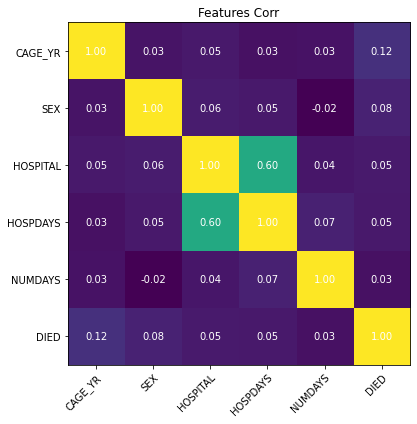

In [10]:
corr_article = df_article[["CAGE_YR", "SEX", "HOSPITAL", "HOSPDAYS", "NUMDAYS", "DIED"]].corr()
cor = ["CAGE_YR", "SEX", "HOSPITAL", "HOSPDAYS", "NUMDAYS", "DIED"]

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(corr_article)
ax.set_xticks(np.arange(len(cor)), labels=cor)
ax.set_yticks(np.arange(len(cor)), labels=cor)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(cor)):
    for j in range(len(cor)):
        text = ax.text(j, i, f"{corr_article.iloc[i, j]:.2f}",
                       ha="center", va="center", color="w")
ax.set_title("Features Corr")
fig.tight_layout()
plt.show()

In [11]:
df_article.describe()

,CAGE_YR,SEX,DIED,HOSPITAL,HOSPDAYS,NUMDAYS
count,45649.000000,45649.000000,45649.000000,45649.000000,45649.000000,45649.000000
mean,45.371837,0.193104,0.006134,0.017613,0.035247,2.026375
std,16.623778,0.394738,0.078079,0.131540,0.439273,4.233492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,104.000000,1.000000,1.000000,1.000000,30.000000,90.000000


### 3. Model [0-4 pts] and 4. Priors [0-4 pts]
Model:
- are two different models specified [1 pt]
- are difference between two models explained [1 pt]
- is the difference in the models justified (e.g. does adding aditional parameter makes sense? ) [1 pt]
- are models sufficiently described (what are formulas, what are parameters, what data are required ) [1 pt]

Priors:
- Is it explained why particular priors for parameters were selected [1 pt]
- Have prior predictive checks been done for parameters (are parameters simulated from priors make sense) [1 pt]
- Have prior predictive checks been done for measurements (are measurements simulated from priors make sense) [1 pt]
- How prior parameters were selected [1 pt]

The concept for developing the model is derived from the article available at: [Age and Gender Disparities in Adverse Events Following COVID-19 Vaccination: Real-World Evidence Based on Big Data for Risk Management](https://www.frontiersin.org/journals/medicine/articles/10.3389/fmed.2021.700014/full)

The article analyzes data from the VAERS system covering the period from December 14, 2020, to January 22, 2021. By utilizing the information provided in this article and the corresponding data available on the VAERS website, it is possible to create functions describing mortality probability. Subsequently, using the appropriate coefficient values, two models were developed.

As described in section 1:\
The data used to create the models is sourced from the VAERS datasets for the year 2022, available at [VAERS datasets](https://vaers.hhs.gov/data/datasets.html). This data contains reported cases of vaccination adverse reactions in the United States in 2022.

### First model

The first model uses two predictors:
- Patient's age
- Patient's sex

The mortality probability \( p \) for each observation is calculated using the following formula:


$$p[n] = \alpha \cdot \text{e}^{(\beta_{\text{age}} \cdot \text{age}[n])} \cdot ((\beta_{\text{sex}})^{\text{sex}[n]}) / 100$$


Where:\
$\alpha \sim \text{Normal}(0.0215, 0.003)\\$
$\beta_{\text{age}} \sim \text{Normal}(0.0618, 0.001)\\$
$\beta_{\text{sex}} \sim \text{Normal}(1.4, 0.02)\\$
$\text{age}[n] \text{ is the age of the patient from n-th record}\\$
$\text{sex}[n] \text{ is the sex of the patient from n-th record, where 0 represents female and 1 represents male}\\$


The formula ensures that \( p[n] \) is within the bounds [0, 1]. If \( p[n] \) exceeds 1, it is set to 1. If \( p[n] \) is below 0, it is set to 0.

# Model 1 - based on the data from the article - prior analysis

### This is just for reference — the actual model based on the data from 2022 can be found in the next section. Nevertheless, both models use the same formula for calculating mortality probability. The only difference is that both models have slightly different coefficient values.

In [12]:
model_ppc_art = CmdStanModel(stan_file='../models/model_1_prior_art.stan')
R = 100
dict = {
        "N": len(df_article),
        "sex": df_article["SEX"],
        "age": df_article["CAGE_YR"]
}

sim_data_art = model_ppc_art.sample(data=dict,
                        iter_sampling=R,
                        iter_warmup=1,
                        refresh=R,
                        fixed_param=True,
                        chains=1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                    


INFO:cmdstanpy:CmdStan done processing.


In [13]:
death_pred_prior_1_1 = sim_data_art.stan_variable("death")

In [14]:
death_pred_mean_art = np.mean(death_pred_prior_1_1, axis=0)
death_pred_prior_1_1_ = death_pred_prior_1_1.flatten()

### Comparing the mortality probability predicted by the model with the probability observed in the actual data (measured in %).

In [15]:
print(death_pred_mean_art.mean()*100)
print(df_article["DIED"].mean()*100)

0.6061469035466275
0.6133759775679642


### Histogram of values of mortality probability calculated by the model

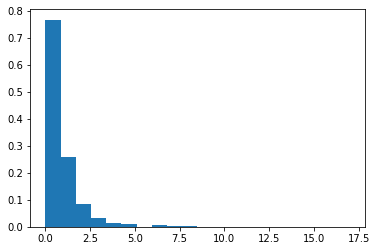

In [16]:
plt.hist(death_pred_mean_art*100,bins=20, density=True)
plt.show()

### Histogram of the distribution of all the prediction records whether a patient died (1 means that the patient died)

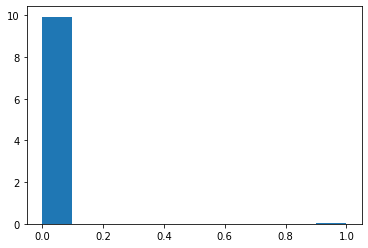

In [17]:
plt.hist(death_pred_prior_1_1_, density=True)
plt.show()

## Model 1 - based on the data from 2022 - Prior analysis

In [19]:
model_ppc_real = CmdStanModel(stan_file='../models/model_1_prior_real.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [20]:
R = 1000
dict = {
        "N": len(df),
        "sex": df["SEX"],
        "age": df["CAGE_YR"]
}

sim_data_real = model_ppc_real.sample(data=dict,
                        iter_sampling=R,
                        iter_warmup=1,
                        refresh=R,
                        fixed_param=True,
                        chains=1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status

chain 1 |██████████| 00:09 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [21]:
death_pred_prior_1_2 = sim_data_real.stan_variable("death")

### Comparing the mortality probability predicted by the model with the probability observed in the actual data (measured in %).

In [159]:
death_pred_real_1 = np.mean(death_pred_prior_1_2, axis=0)
death_pred_real_1_ = death_pred_prior_1_2.flatten()

print(death_pred_real_1.mean()*100)
print(df["DIED"].mean()*100)

1.769159107624418
1.8141701397401324


As the results show, the difference is insignificant.

### Histogram of values of mortality probability calculated by the model

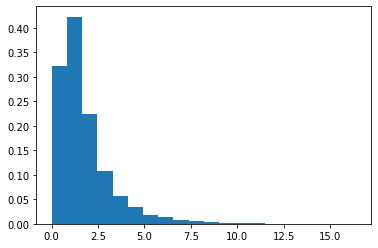

In [160]:
plt.hist(death_pred_real_1*100, bins=20, density=True)
plt.show()

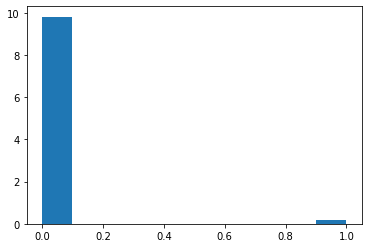

In [161]:
plt.hist(death_pred_real_1_, density=True)
plt.show()

## Model 1 - based on the data from 2022- Posterior analysis

### 5. Posterior analysis (model 1) [0-4 pts]
- were there any issues with the sampling? if there were what kind of ideas for mitigation were used [1 pt]
- are the samples from posterior predictive distribution analyzed [1 pt]
- are the data consistent with posterior predictive samples and is it sufficiently commented (if they are not then is the justification provided)
- have parameter marginal disrtibutions been analyzed (histograms of individual parametes plus summaries, are they diffuse or concentrated, what can we say about values) [1 pt]

In [24]:
model_1_posterior = CmdStanModel(stan_file='../models/model_1_posterior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [25]:
R = 1000
dict = {
        "N": len(df),
        "age": df["CAGE_YR"],
        "sex": df["SEX"],
        "death": df["DIED"]
    }

fit = model_1_posterior.sample(data=dict, seed=42)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |▉         | 00:06 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:13 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:19 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:23 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:28 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:32 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:35 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:39 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:42 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:46 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:50 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:55 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 01:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 01:04


INFO:cmdstanpy:CmdStan done processing.


In [27]:
death_pred_posterior = fit.stan_variable("death_pred")

In [28]:
death_pred_mean = np.mean(death_pred_posterior, axis=0)
death_pred_flat = death_pred_posterior.flatten()

In [29]:
print(death_pred_mean.mean()*100)
print(df["DIED"].mean()*100)

1.835934052463839
1.8141701397401324


As the results show, the difference is insignificant.

In [30]:
pred_died = [el>=0.5 for el in death_pred_mean]
sum(pred_died)

0

/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


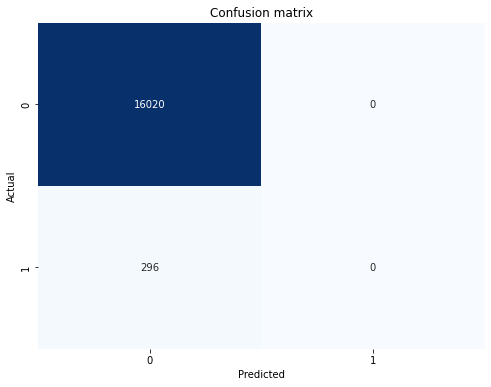

Accuracy: 0.9818582986025987
Precision: 0.0
Recall: 0.0
F1 score: 0.0


In [158]:
accuracy = accuracy_score(df['DIED'], pred_died)
precision = precision_score(df['DIED'], pred_died)
recall = recall_score(df["DIED"], pred_died)
f1 = f1_score(df["DIED"], pred_died)

conf_matrix = confusion_matrix(df["DIED"], pred_died)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

### Histogram of values of mortality probability calculated by the model

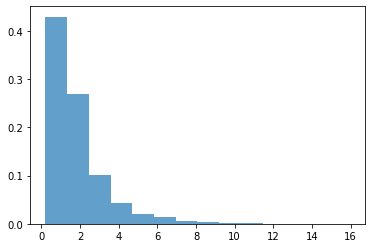

In [33]:
plt.hist(death_pred_mean*100, bins=14, density=True, alpha=0.7)
plt.show()

### Histogram of the distribution of all the prediction records whether a patient died (1 means that the patient died)

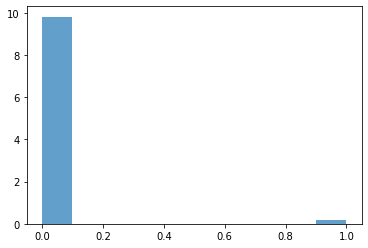

In [34]:
plt.hist(death_pred_flat, density=True, alpha=0.7)
plt.show()

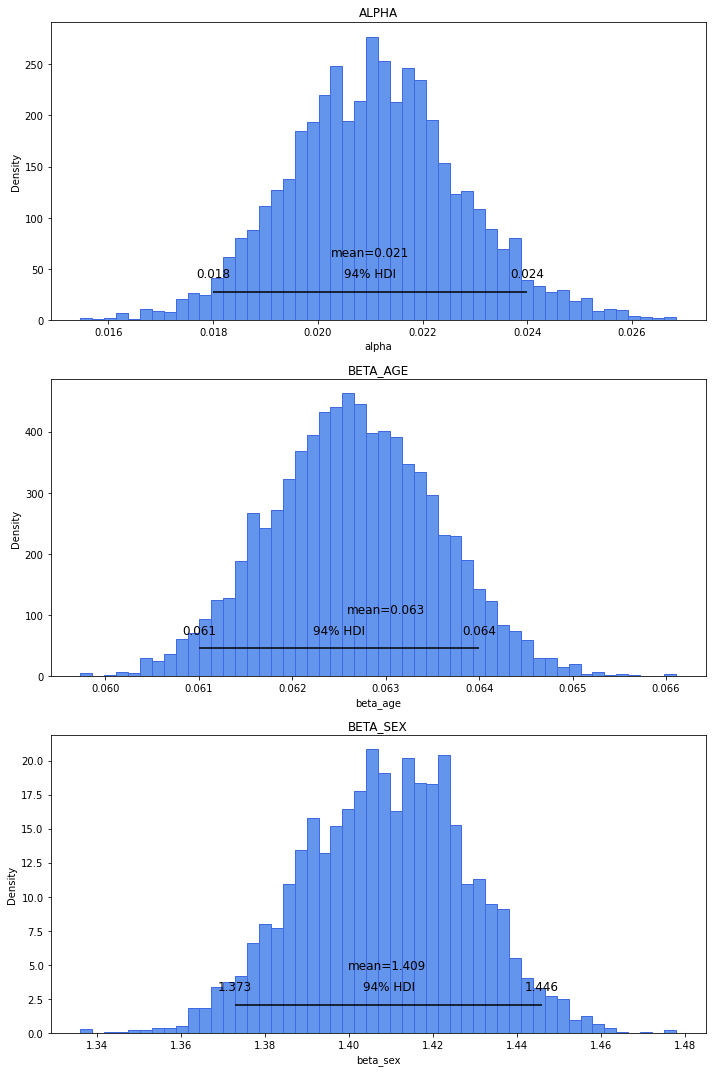

In [35]:
param_names = ['alpha', 'beta_age', 'beta_sex']

n_params = len(param_names)
n_rows, n_cols = n_params, 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10*n_cols, 5*n_rows))


for i, param_name in enumerate(param_names):
    param_values = fit.stan_variable(param_name)

    counts, bins, patches = axes[i].hist(param_values.flatten(), bins=50, color='cornflowerblue', edgecolor='royalblue', density=True)

    statistics = az.summary(fit, var_names=[param_name], kind='stats', hdi_prob=0.94)

    hdi_l = statistics.loc[param_name, 'hdi_3%']
    hdi_h = statistics.loc[param_name, 'hdi_97%']
    mean = statistics.loc[param_name, 'mean']
    
    max_count = max(counts)
    y_hdi = max_count * 0.1
    y_annotate = max_count * 0.15

    # Plot HDI line and annotations
    axes[i].hlines(y=y_hdi, xmin=hdi_l, xmax=hdi_h, color='black')
    axes[i].annotate(f'{hdi_l:.3f}', xy=(hdi_l, y_annotate), xycoords='data', fontsize=12, horizontalalignment='center')
    axes[i].annotate(f'{hdi_h:.3f}', xy=(hdi_h, y_annotate), xycoords='data', fontsize=12, horizontalalignment='center')
    axes[i].annotate('94% HDI', xy=((hdi_l + hdi_h) / 2, y_annotate), xycoords='data', fontsize=12, horizontalalignment='center')
    axes[i].annotate(f'mean={mean:.3f}', xy=(mean, y_annotate * 1.5), xycoords='data', fontsize=12, horizontalalignment='center')
    
    axes[i].set_title(param_name.upper())
    axes[i].set_xlabel(param_name)
    axes[i].set_ylabel('Density')

fig.tight_layout()
plt.show()

# Model 2 - based on the data from the article - prior analysis

### This is just for reference — the actual model based on the data from 2022 can be found in the next section. Nevertheless, both models use the same formula for calculating mortality probability. The only difference is that both models have slightly different coefficient values.

In [120]:
model_2_ppc_art = CmdStanModel(stan_file='../models/model_2_prior_art.stan')

INFO:cmdstanpy:compiling stan file /root/models/model_2_prior_art.stan to exe file /root/models/model_2_prior_art
INFO:cmdstanpy:compiled model executable: /root/models/model_2_prior_art


In [121]:
R = 1000
dict = {
        "N": len(df_article),
        "sex": df_article["SEX"],
        "age": df_article["CAGE_YR"],
        "hospital_days" : df_article["HOSPDAYS"]
}

sim_data_art_2 = model_2_ppc_art.sample(data=dict,
                        iter_sampling=R,
                        iter_warmup=1,
                        refresh=R,
                        fixed_param=True,
                        chains=1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:25 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [122]:
death_pred_prior_2_1 = sim_data_art_2.stan_variable("death")

In [123]:
death_pred_mean_2_art = np.mean(death_pred_prior_2_1, axis=0)
death_pred_prior_2_1_ = death_pred_prior_2_1.flatten()

In [124]:
print(death_pred_mean_2_art.mean()*100)
print(df_article["DIED"].mean()*100)

0.6103441477359856
0.6133759775679642


### Histogram of values of mortality probability calculated by the model

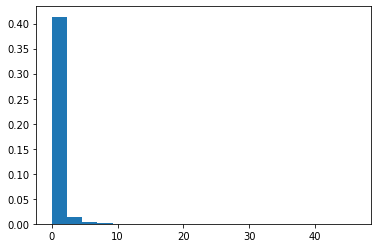

In [125]:
plt.hist(death_pred_mean_2_art*100, bins=20, density=True)
plt.show()

### Histogram of the distribution of all the prediction records whether a patient died (1 means that the patient died)

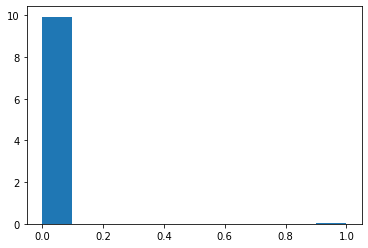

In [126]:
plt.hist(death_pred_prior_2_1_, density=True)
plt.show()

## Model 2 - based on the data from 2022 - Prior analysis

The second model extends the first model by adding a new parameter:

Number of days patient spent in hospital
The mortality probability 𝑝[n] for each observation is calculated using the following formula:

$$
p[n] = \alpha \cdot \text{e}^{(\beta_{\text{age}} \cdot \text{age}[n])} \cdot ((\beta_{\text{sex}})^{\text{sex}[n]}) \cdot \left( \delta \cdot \text{e}^{-\frac{(\text{hospital\_days}[n] - 14)^2}{2\phi^2}} \right) / 100
$$

Where:\
$\alpha \sim \text{Normal}(0.0215, 0.003)\\$
$\beta_{\text{age}} \sim \text{Normal}(0.0618, 0.001)\\$
$\beta_{\text{sex}} \sim \text{Normal}(1.4, 0.02)\\$
$\delta \sim \text{Normal}(9.4, 0.5)\\$
$\phi \sim \text{Normal}(6.2, 0.3)\\$
$\text{age}[n] \text{ is the age of the patient from n-th record}\\$
$\text{sex}[n] \text{ is the sex of the patient from n-th record, where 0 represents female and 1 represents male}\\$
$\text{hospital\_days}[n] \text{ is the number of days the patient spent in the hospital from n-th record}\\$


The formula ensures that \( p[n] \) is within the bounds [0, 1]. If \( p[n] \) exceeds 1, it is set to 1. If \( p[n] \) is below 0, it is set to 0.

In [131]:
model_2_ppc_real = CmdStanModel(stan_file='../models/model_2_prior_real.stan')

INFO:cmdstanpy:compiling stan file /root/models/model_2_prior_real.stan to exe file /root/models/model_2_prior_real
INFO:cmdstanpy:compiled model executable: /root/models/model_2_prior_real


In [132]:
R = 1000
dict = {
        "N": len(df),
        "sex": df["SEX"],
        "age": df["CAGE_YR"],
        "hospital_days" : df["HOSPDAYS"]
}

sim_data_real_2 = model_2_ppc_real.sample(data=dict,
                        iter_sampling=R,
                        iter_warmup=1,
                        refresh=R,
                        fixed_param=True,
                        chains=1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:09 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [133]:
death_pred_prior_2_2 = sim_data_real_2.stan_variable("death")

### Comparing the mortality probability predicted by the model with the probability observed in the actual data (measured in %).

In [134]:
death_pred_real_2_mean = np.mean(death_pred_prior_2_2, axis=0)
death_pred_real_2_flat = death_pred_prior_2_2.flatten()
print(death_pred_real_2_mean.mean()*100)
print(df["DIED"].mean()*100)

1.8403652856092179
1.8141701397401324


As the results show, the difference is insignificant.

In [135]:
death_pred_real_2_mean.max()

0.833

### Confusion matrix

In [136]:
pred_died_2 = [el>=0.5 for el in death_pred_real_2_mean]
sum(pred_died_2)

11

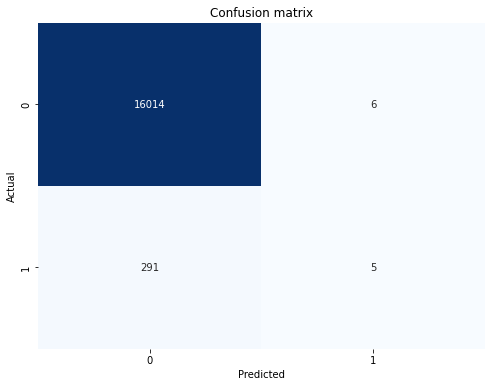

Accuracy: 0.9817970090708507
Precision: 0.45454545454545453
Recall: 0.016891891891891893
F1 score: 0.03257328990228013


In [162]:
accuracy_2_prior = accuracy_score(df['DIED'], pred_died_2)
precision_2_prior = precision_score(df['DIED'], pred_died_2)
recall_2_prior = recall_score(df["DIED"], pred_died_2)
f1_2_prior = f1_score(df["DIED"], pred_died_2)

conf_matrix = confusion_matrix(df["DIED"], pred_died_2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Accuracy: {accuracy_2_prior}")
print(f"Precision: {precision_2_prior}")
print(f"Recall: {recall_2_prior}")
print(f"F1 score: {f1_2_prior}")

### Histogram of values of mortality probability calculated by the model

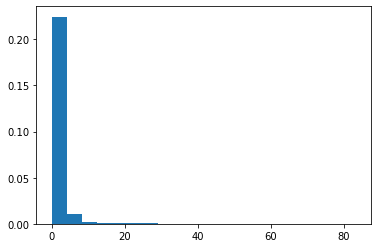

In [138]:
plt.hist(death_pred_real_2_mean*100, bins=20, density=True)
plt.show()

### Histogram of the distribution of all the prediction records whether a patient died (1 means that the patient died)

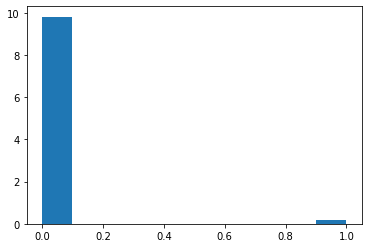

In [140]:
plt.hist(death_pred_real_2_flat, density=True)
plt.show()

## Model 2 - based on the data from 2022- Posterior analysis

### 6. Posterior analysis (model 2) [0-4 pts]
- were there any issues with the sampling? if there were what kind of ideas for mitigation were used [1 pt]
- are the samples from posterior predictive distribution analyzed [1 pt]
- are the data consistent with posterior predictive samples and is it sufficiently commented (if they are not then is the justification provided)
- have parameter marginal disrtibutions been analyzed (histograms of individual parametes plus summaries, are they diffuse or concentrated, what can we say about values) [1 pt]

In [141]:
model_2_posterior = CmdStanModel(stan_file='../models/model_2_posterior.stan')

INFO:cmdstanpy:compiling stan file /root/models/model_2_posterior.stan to exe file /root/models/model_2_posterior


INFO:cmdstanpy:compiled model executable: /root/models/model_2_posterior


In [142]:
R = 1000
dict = {
        "N": len(df),
        "age": df["CAGE_YR"],
        "sex": df["SEX"],
        "hospital_days": df["HOSPDAYS"],
        "death": df["DIED"]
    }

fit_2 = model_2_posterior.sample(data=dict, seed=42)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 3 |          | 00:00 Status

chain 1 |▍         | 00:00 Status



chain 1 |▉         | 00:22 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 04:05 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 05:15 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 05:54 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 06:37 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 07:20 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 07:56 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 08:26 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 08:56 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████▍    | 09:21 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |█████▉    | 09:46 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 10:15 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 10:41 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  |


INFO:cmdstanpy:CmdStan done processing.


In [143]:
death_pred_posterior_2 = fit_2.stan_variable("death_pred")

In [144]:
death_pred_mean_2 = np.mean(death_pred_posterior_2, axis=0)
death_pred_flat_2 = death_pred_posterior_2.flatten()

### Comparing the mortality probability predicted by the model with the probability observed in the actual data (measured in %).

In [145]:
print(death_pred_mean_2.mean()*100)
print(df["DIED"].mean()*100)

1.6827270777151266
1.8141701397401324


While the results show, that the difference is slightly bigger than for the other models, it is still an acceptable margin of error.

In [146]:
pred_died_2_post = [el>=0.5 for el in death_pred_mean_2]
sum(pred_died_2_post)

23

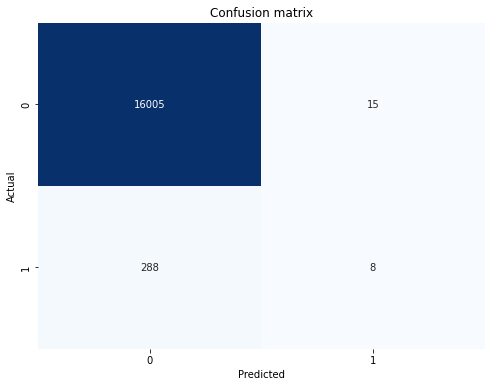

Accuracy: 0.9814292718803629
Precision: 0.34782608695652173
Recall: 0.02702702702702703
F1 score: 0.050156739811912224


In [147]:
accuracy_2 = accuracy_score(df['DIED'], pred_died_2_post)
precision_2 = precision_score(df['DIED'], pred_died_2_post)
recall_2 = recall_score(df["DIED"], pred_died_2_post)
f1_2 = f1_score(df["DIED"], pred_died_2_post)

conf_matrix = confusion_matrix(df["DIED"], pred_died_2_post)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Accuracy: {accuracy_2}")
print(f"Precision: {precision_2}")
print(f"Recall: {recall_2}")
print(f"F1 score: {f1_2}")

### Histogram of values of mortality probability calculated by the model

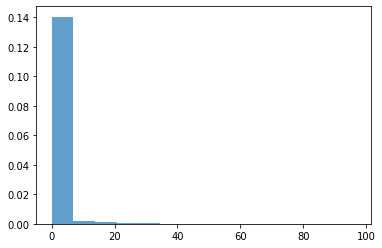

In [151]:
plt.hist(death_pred_mean_2*100, bins=14, density=True, alpha=0.7)
plt.show()

### Histogram of the distribution of all the prediction records whether a patient died (1 means that the patient died)

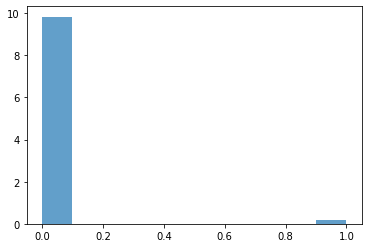

In [152]:
plt.hist(death_pred_flat_2, density=True, alpha=0.7)
plt.show()

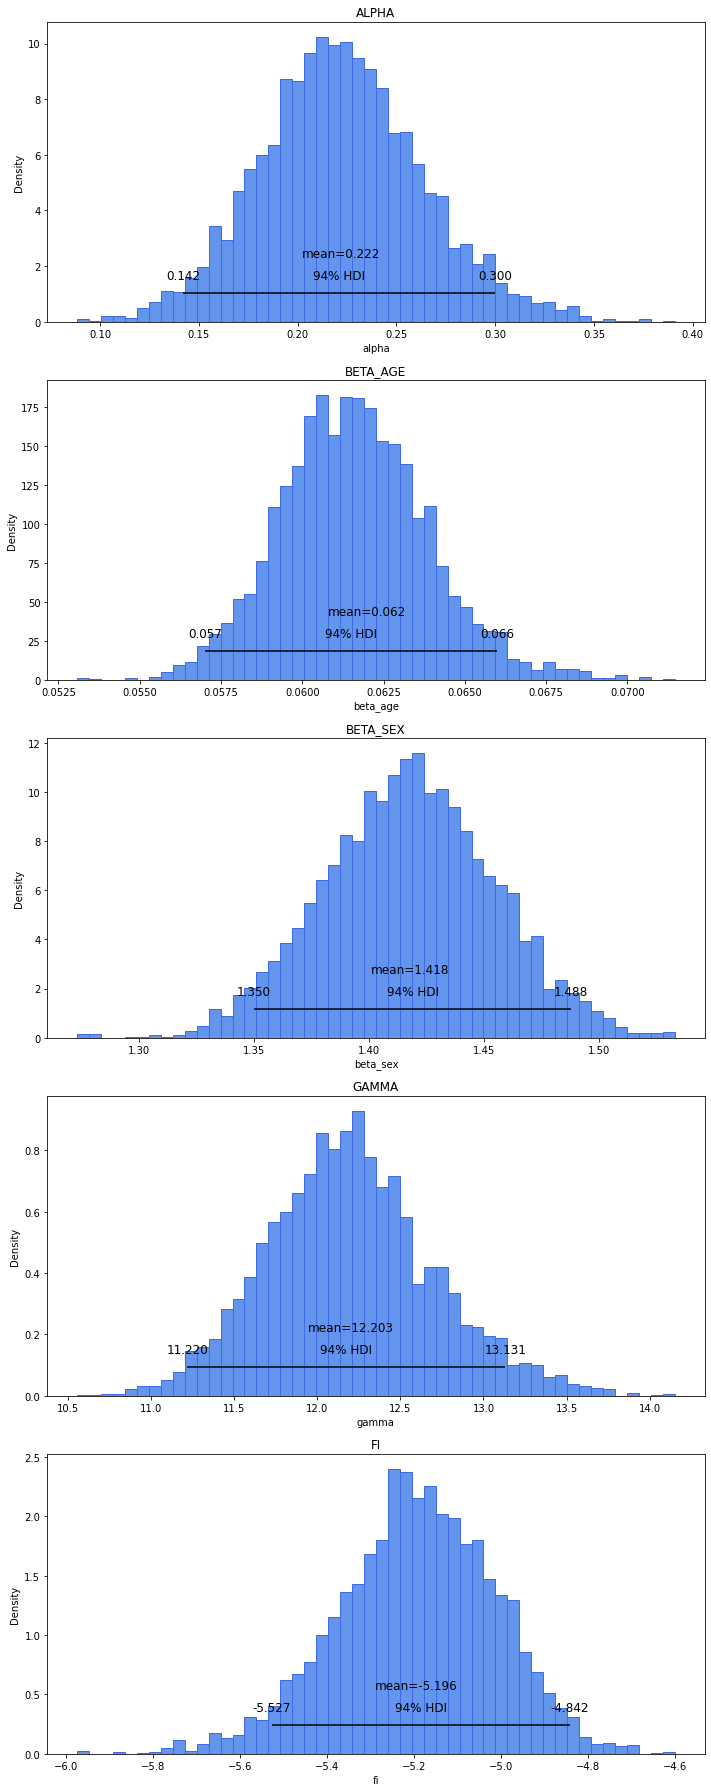

In [153]:
param_names = ['a', 'b', 'c', 'd', 'f']
new_names = {'a':'alpha', 'b':'beta_age', 'c':'beta_sex', 'd':"gamma", 'f':"fi"}

n_params = len(param_names)
n_rows, n_cols = n_params, 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10*n_cols, 5*n_rows))


for i, param_name in enumerate(param_names):
    param_values = fit_2.stan_variable(param_name)

    counts, bins, patches = axes[i].hist(param_values.flatten(), bins=50, color='cornflowerblue', edgecolor='royalblue', density=True)

    statistics = az.summary(fit_2, var_names=[param_name], kind='stats', hdi_prob=0.94)

    hdi_l = statistics.loc[param_name, 'hdi_3%']
    hdi_h = statistics.loc[param_name, 'hdi_97%']
    mean = statistics.loc[param_name, 'mean']
    
    max_count = max(counts)
    y_hdi = max_count * 0.1
    y_annotate = max_count * 0.15

    # Plot HDI line and annotations
    axes[i].hlines(y=y_hdi, xmin=hdi_l, xmax=hdi_h, color='black')
    axes[i].annotate(f'{hdi_l:.3f}', xy=(hdi_l, y_annotate), xycoords='data', fontsize=12, horizontalalignment='center')
    axes[i].annotate(f'{hdi_h:.3f}', xy=(hdi_h, y_annotate), xycoords='data', fontsize=12, horizontalalignment='center')
    axes[i].annotate('94% HDI', xy=((hdi_l + hdi_h) / 2, y_annotate), xycoords='data', fontsize=12, horizontalalignment='center')
    axes[i].annotate(f'mean={mean:.3f}', xy=(mean, y_annotate * 1.5), xycoords='data', fontsize=12, horizontalalignment='center')
    
    axes[i].set_title(new_names[param_name].upper())
    axes[i].set_xlabel(new_names[param_name])
    axes[i].set_ylabel('Density')

fig.tight_layout()
plt.show()

# Models comparison

### 7. Model comaprison [0-4 pts]
- have models been compared using information criteria [1 pt]
- have result for WAIC been discussed (is there a clear winner, or is there an overlap, were there any warnings) [1 pt]
- have result for PSIS-LOO been discussed (is there a clear winner, or is there an overlap, were there any warnings) [1 pt]
- what the model comparison discussed? Do authors agree with information criteria? Why in your opinion one model better than another [1 pt]

### PSIS-LOO

<AxesSubplot:xlabel='Deviance'>

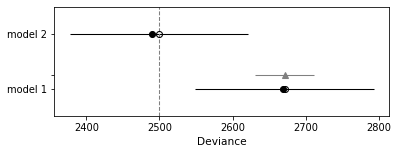

In [154]:
comp_dict = {"model 1":fit, "model 2": fit_2}
comp_loo = az.compare(comp_dict, ic="loo", scale="deviance")
az.plot_compare(comp_loo)

In [155]:
comp_loo

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model 2,0,2499.086431,4.951228,0.000000,0.773503,122.151173,0.000000,False,deviance
model 1,1,2671.345204,0.927311,172.258773,0.226497,122.111257,39.935887,False,deviance


### WAIC

/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


<AxesSubplot:xlabel='Deviance'>

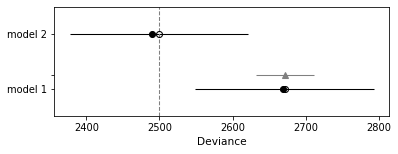

In [156]:
comp_waic = az.compare(comp_dict, ic="waic",scale="deviance")
az.plot_compare(comp_waic)

In [157]:
comp_waic

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model 2,0,2499.028040,4.922032,0.000000,0.773624,122.147837,0.000000,True,deviance
model 1,1,2671.345208,0.927313,172.317169,0.226376,122.111257,39.928669,False,deviance
